In [60]:
import tensorflow as tf 
import keras
import numpy as np
import pandas as pd
import seaborn as sns

seed=111
np.random.seed(seed) 
tf.random.set_seed(seed)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten 
from keras.layers import MaxPooling2D, Dropout

from skimage import io
import matplotlib.pyplot as plt

import os

from keras_preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2

In [61]:
df = pd.read_csv("datasets/styles.csv", usecols = [0,1,2,3,4,5,6,7,8,9])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
id                    44446 non-null int64
gender                44446 non-null object
masterCategory        44446 non-null object
subCategory           44446 non-null object
articleType           44446 non-null object
baseColour            44431 non-null object
season                44425 non-null object
year                  44445 non-null float64
usage                 44129 non-null object
productDisplayName    44439 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


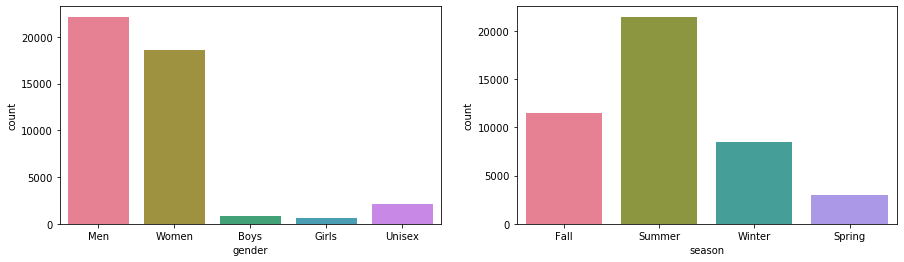

In [85]:
f, axes = plt.subplots(1, 2, figsize=(15,4)) 

sns.countplot(x="gender", data=df, ax=axes[0], palette = "husl")
sns.countplot(x="season", data=df, ax=axes[1], palette = "husl")

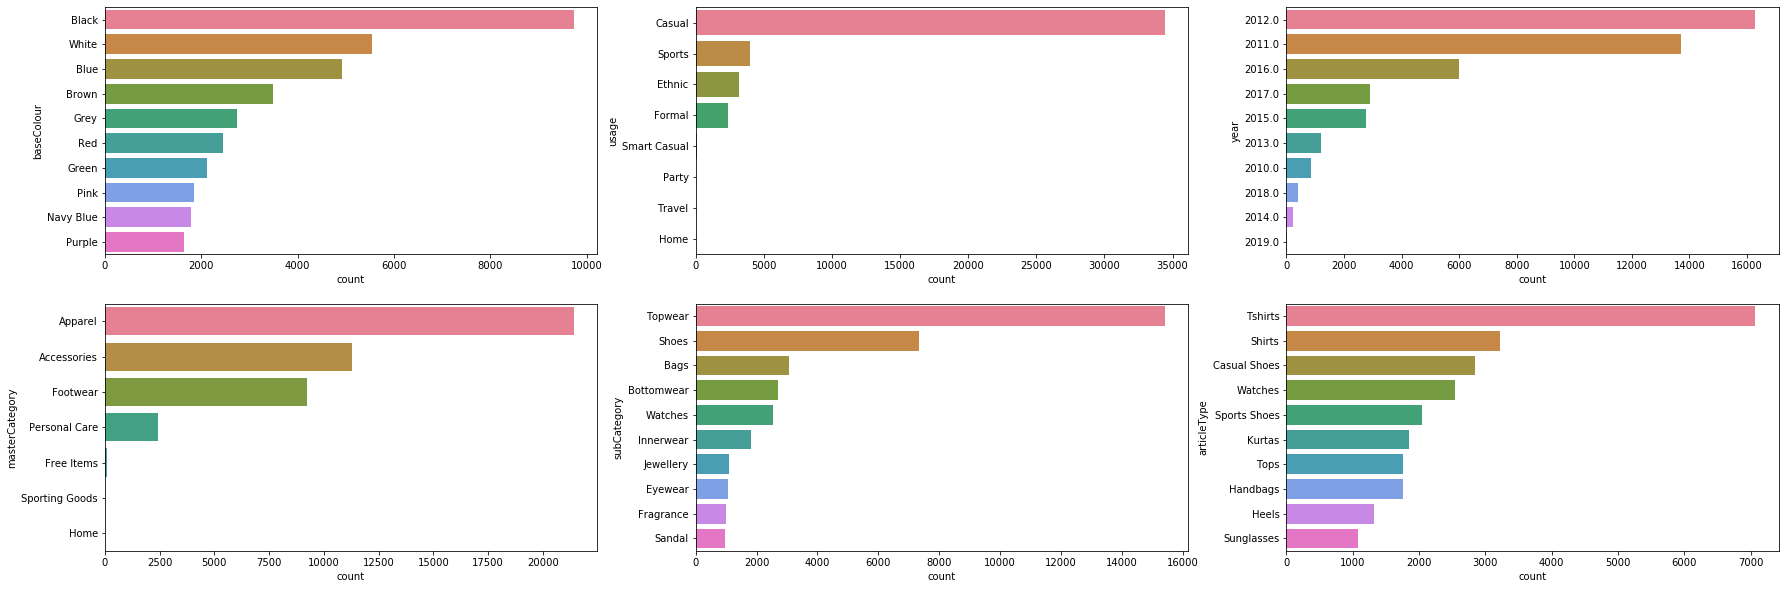

In [83]:
f, axes = plt.subplots(2, 3, figsize=(30,10)) 
sns.countplot(y="baseColour", data=df, ax=axes[0,0], order=df.baseColour.value_counts().iloc[:10].index, palette = "husl")
sns.countplot(y="usage", data=df, ax=axes[0,1], order=df.usage.value_counts().iloc[:10].index, palette = "husl")
sns.countplot(y="year", data=df, ax=axes[0,2], order=df.year.value_counts().iloc[:10].index, palette = "husl")

sns.countplot(y="masterCategory", data=df, ax=axes[1,0], order=df.masterCategory.value_counts().iloc[:10].index, palette = "husl")
sns.countplot(y="subCategory", data=df, ax=axes[1,1], order=df.subCategory.value_counts().iloc[:10].index, palette = "husl")
sns.countplot(y="articleType", data=df, ax=axes[1,2],order=df.articleType.value_counts().iloc[:10].index, palette = "husl")

In [88]:
# targets = ['Topwear','Shoes','Bags','Bottomwear','Watches']
# df = df[df['subCategory'].isin(targets)]
# df['subCategory'].value_counts()
targets = [ "Shirts", "Watches", "Sports Shoes", "Tops", "Handbags", "Heels", "Sunglasses", "Backpacks", "Jeans", "Shorts"]
df = df[df['articleType'].isin(targets)]
df['articleType'].value_counts()

Shirts          3217
Watches         2542
Sports Shoes    2036
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Backpacks        724
Jeans            609
Shorts           547
Name: articleType, dtype: int64

In [95]:
large = ["Shirts", "Watches", "Sports Shoes", "Tops", "Handbags", "Heels", "Sunglasses"]
small = ["Backpacks", "Jeans", "Shorts"]

In [103]:
lst = []
for t in targets:
    temp = df[df['articleType'] == t]
    if t in small:
        lst.append(temp)
    else:
        lst.append(temp.sample(n = 1000, random_state = seed))
mydf = pd.concat(lst)

In [104]:
mydf['articleType'].value_counts()

Sunglasses      1000
Watches         1000
Tops            1000
Handbags        1000
Shirts          1000
Heels           1000
Sports Shoes    1000
Backpacks        724
Jeans            609
Shorts           547
Name: articleType, dtype: int64

In [105]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8880 entries, 32029 to 44422
Data columns (total 10 columns):
id                    8880 non-null int64
gender                8880 non-null object
masterCategory        8880 non-null object
subCategory           8880 non-null object
articleType           8880 non-null object
baseColour            8874 non-null object
season                8871 non-null object
year                  8880 non-null float64
usage                 8880 non-null object
productDisplayName    8880 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 763.1+ KB


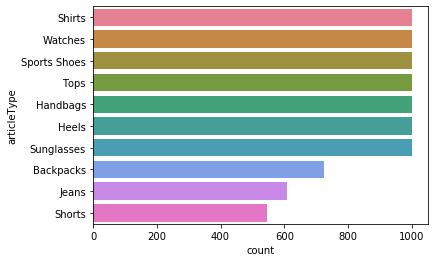

In [106]:
sns.countplot(y="articleType", data=mydf, palette = "husl")

In [146]:
mydf.to_csv("datasets/mystyle.csv", index = False)

In [108]:
train_df = mydf[['articleType', 'id']].sample(frac=0.8,random_state = seed) 
test_df = mydf[['articleType', 'id']].drop(train_df.index)

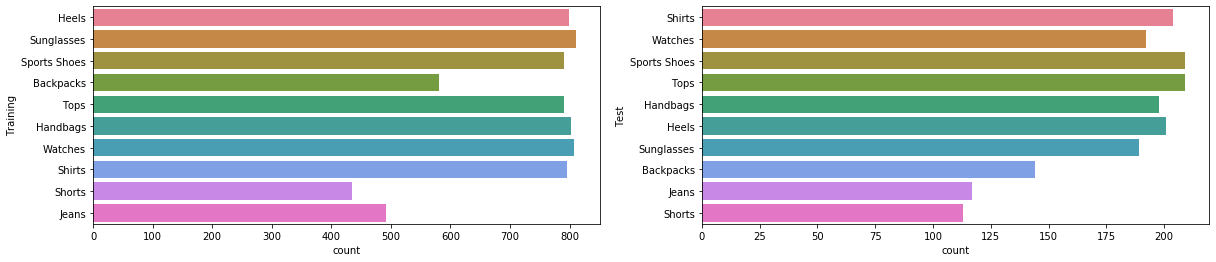

In [112]:
f, axes = plt.subplots(1, 2, figsize=(20,4)) 
sns.countplot(y="articleType", data=train_df, ax=axes[0], palette = "husl").set(ylabel='Training');
sns.countplot(y="articleType", data=test_df, ax=axes[1], palette = "husl").set(ylabel='Test');

In [113]:
test_df.head(10)

,articleType,id
40543,Shirts,51410
35201,Shirts,9501
18175,Shirts,33492
16550,Shirts,7054
37158,Shirts,12295
12017,Shirts,12237
37424,Shirts,38999
34431,Shirts,30106
42161,Shirts,25537
24077,Shirts,59294


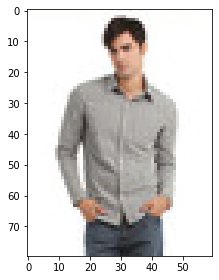

In [114]:
img_id = 51410
path = "datasets/images/{}.jpg".format(img_id)
img1 = io.imread(path)
io.imshow(img1)


In [130]:
IMAGE_SHAPE = img1.shape
IMAGE_SHAPE

(80, 60, 3)

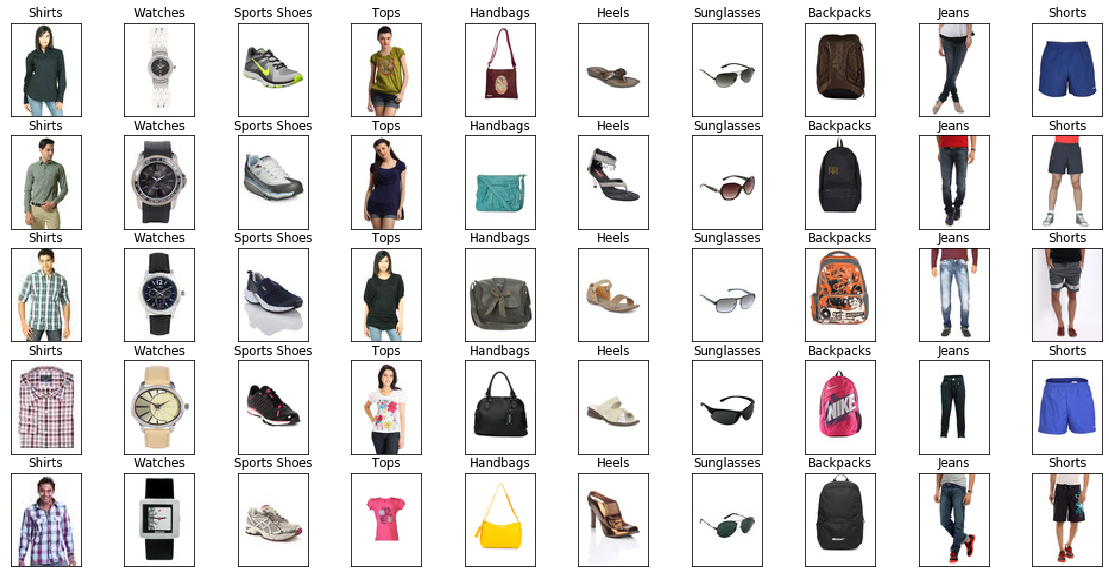

In [128]:
%matplotlib inline 

fig, axarr = plt.subplots(nrows=5, ncols=10, figsize=(20,10))

for i, cat in enumerate(targets):
    for j, img_id in enumerate(train_df[train_df["articleType"] == cat]['id'][:5]):
        path = "datasets/images/{}.jpg".format(img_id)
        img = io.imread(path)
        axarr[j,i].imshow(img)
        axarr[j,i].set_xticks([])
        axarr[j,i].set_yticks([])
        axarr[j,i].set_title("{}".format(cat))


In [40]:
DATASET_PATH = "datasets/images/"


In [131]:
train_df['image'] = train_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
train_df = train_df.sample(frac=1).reset_index(drop=True)

test_df['image'] = test_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [133]:
batch_size = 32

image_generator = ImageDataGenerator(
    validation_split=0.2
)

training_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=DATASET_PATH,
    x_col="image",
    y_col="articleType",
    target_size=(80,60),  
    batch_size=batch_size,
    subset="training",
    seed=seed,
    shuffle=True
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=DATASET_PATH,
    x_col="image",
    y_col="articleType",
    target_size=(80,60),
    batch_size=batch_size,
    subset="validation",
    seed=seed,
    shuffle=True
)

classes = training_generator.class_indices

test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=DATASET_PATH,
    x_col="image",
    y_col="articleType",
    batch_size=batch_size,
    seed=110,
    shuffle=seed,
    target_size=(80,60)
)

Found 5684 validated image filenames belonging to 10 classes.
Found 1420 validated image filenames belonging to 10 classes.
Found 1775 validated image filenames belonging to 10 classes.


/Users/zihe/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [138]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=IMAGE_SHAPE))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 76, 56, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 38, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 13056)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              13057000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)             

In [141]:
from math import ceil



hist = model.fit_generator(
    generator=training_generator,
    steps_per_epoch=ceil(0.8 * (train_df.size / batch_size)),

    validation_data=validation_generator,
    validation_steps=ceil(0.2 * (train_df.size / batch_size)),

    epochs=3,
)

Epoch 1/3
533/533 [==============================] - 137s 258ms/step - loss: 0.2527 - accuracy: 0.9224 - val_loss: 0.3221 - val_accuracy: 0.9077
Epoch 2/3
533/533 [==============================] - 148s 278ms/step - loss: 0.1992 - accuracy: 0.9371 - val_loss: 0.0725 - val_accuracy: 0.9283
Epoch 3/3
533/533 [==============================] - 146s 274ms/step - loss: 0.1348 - accuracy: 0.9558 - val_loss: 0.3524 - val_accuracy: 0.9331


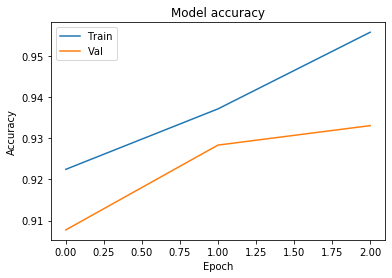

In [142]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

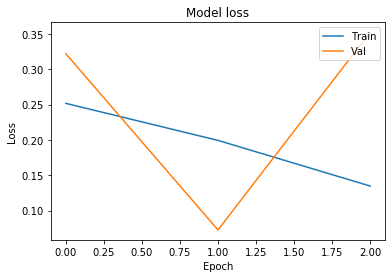

In [143]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [144]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
score = model.evaluate_generator(generator=test_generator, steps=STEP_SIZE_TEST)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.5470337867736816
Test accuracy: 0.14318181574344635


In [50]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()

pred = model.predict_generator(
    test_generator,
    steps=STEP_SIZE_TEST,
    verbose=1
)

7/7 [==============================] - 2s 318ms/step


In [52]:
predicted_class_indices = np.argmax(pred, axis=1)
predicted_class_indices

array([3, 4, 3, 3, 1, 0, 0, 0, 4, 0, 0, 2, 3, 2, 3, 2, 4, 0, 4, 2, 4, 2,
       2, 2, 2, 0, 3, 1, 0, 0, 3, 2, 1, 4, 4, 3, 0, 2, 0, 1, 1, 2, 1, 1,
       2, 1, 4, 3, 2, 2, 2, 3, 1, 4, 3, 3, 1, 4, 3, 3, 4, 3, 2, 0, 4, 2,
       1, 4, 0, 0, 1, 1, 1, 4, 0, 3, 3, 3, 4, 4, 1, 2, 0, 2, 4, 3, 3, 0,
       3, 0, 2, 1, 4, 4, 4, 3, 4, 1, 4, 4, 3, 0, 1, 2, 0, 0, 4, 0, 0, 0,
       1, 0, 2, 3, 1, 2, 1, 1, 0, 4, 1, 1, 2, 4, 4, 4, 2, 2, 0, 1, 3, 3,
       4, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 4, 1, 4, 2, 1, 3, 3, 4, 4, 3, 3,
       4, 0, 4, 2, 3, 3, 1, 0, 4, 2, 2, 0, 2, 0, 1, 0, 1, 4, 1, 4, 4, 4,
       1, 0, 3, 0, 3, 1, 0, 2, 4, 1, 3, 4, 4, 4, 3, 0, 3, 2, 0, 0, 4, 1,
       4, 1, 0, 0, 3, 4, 2, 1, 2, 2, 2, 1, 3, 3, 0, 1, 2, 1, 4, 3, 4, 1,
       0, 2, 3, 2])

In [56]:
labels = (training_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions[:3]

['Topwear', 'Watches', 'Topwear']